___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Example for Sine Wave

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

## Data

Let's use Numpy to create a simple sine wave

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [5]:
x[:50]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [6]:
y[:25]

array([0.        , 0.09983342, 0.19866933, 0.29552021, 0.38941834,
       0.47942554, 0.56464247, 0.64421769, 0.71735609, 0.78332691,
       0.84147098, 0.89120736, 0.93203909, 0.96355819, 0.98544973,
       0.99749499, 0.9995736 , 0.99166481, 0.97384763, 0.94630009,
       0.90929743, 0.86320937, 0.8084964 , 0.74570521, 0.67546318])

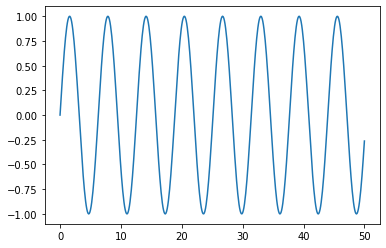

In [7]:
plt.plot(x,y)

Let's turn this into a DataFrame

In [8]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [9]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


## Train Test Split

Note! This is very different from our usual split methodology!

In [10]:
len(df)

501

In [11]:
test_percent = 0.1

In [12]:
len(df)*test_percent

50.1

In [13]:
test_point = np.round(len(df)*test_percent)
test_point

50.0

In [15]:
test_index = int(len(df) - test_point)
test_index

451

In [16]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [18]:
train.tail()

,Sine
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208
45.0,0.850904


In [19]:
test.head()

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


## Scale Data

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

Ignore warning, it's just converting to floats.
We only fit to train data, otherwise we are cheating assuming info about test set.

In [22]:
train.max()

Sine    0.999994
dtype: float64

In [25]:
train.mean()

Sine    0.01146
dtype: float64

In [26]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [27]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [28]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [31]:
scaled_train.mean()

0.5057289574261253

In [32]:
# define generator
length = 2
batch_size = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,
                               batch_size=batch_size)

In [33]:
len(scaled_train)

451

In [38]:
len(generator)

449

In [45]:
# What does the first batch look like?
X,y = generator[0]

In [47]:
print(f"Given the Array: {X.flatten()}")
print(f'Predict this y: {y}')

Given the Array: [0.49999912 0.54991622]
Predict this y: [[0.59933458]]


Let's redefine to get 10 steps back and then predict the next step out. 

In [67]:
length = 10
generator = TimeseriesGenerator(scaled_train,
                               scaled_train,
                               length=length,
                                batch_size=1)

In [68]:
# What does the first batch look like?
X,y = generator[0]

In [69]:
print(f"Given the Array: {X.flatten()}")
print(f'Predict this y: {y}')

Given the Array: [0.49999912 0.54991622 0.59933458 0.64776041 0.69470985 0.73971381
 0.78232262 0.82211054 0.85868004 0.89166571]
Predict this y: [[0.92073798]]


In [71]:
length = 50
generator = TimeseriesGenerator(scaled_train,
                               scaled_train,
                               length=length,
                               batch_size=1)

Now you will be able to edit the length so that it makes sence for your time series!

## Create the model

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [73]:
# We're only using one feature in our time series
n_features = 1

In [75]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(50, input_shape=(length,n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [77]:
# fit model
model.fit_generator(generator,epochs=5,verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 401 steps
Epoch 1/5
401/401 - 9s - loss: 0.0141
Epoch 2/5
401/401 - 8s - loss: 8.5764e-05
Epoch 3/5
401/401 - 8s - loss: 3.3193e-04
Epoch 4/5
401/401 - 8s - loss: 1.8593e-05
Epoch 5/5
401/401 - 8s - loss: 7.0519e-04


In [79]:
model.history.history.keys()

dict_keys(['loss'])

In [80]:
losses = pd.DataFrame(model.history.history)

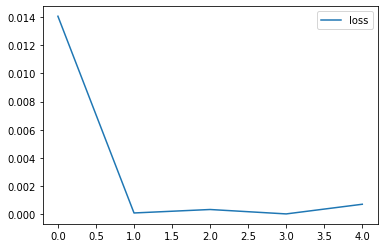

In [81]:
losses.plot()